In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from ctree.analysis_tree_helpers import HTree, do_merges
from ctree.utils import get_path

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format="retina"

# Load a tree from the .csv file
htree = HTree(htree_file=get_path() + "/data/tree_20180520.csv")

# subtree is a instance of class HTree as well:
subtree = htree.get_subtree(node="n3")

In [2]:
L = subtree.get_mergeseq()

In [3]:
merged_sample_labels = do_merges(labels=subtree.child[subtree.isleaf], list_changes=L, n_merges=30)
kept_leaf_nodes = np.unique(merged_sample_labels).tolist()



---- Plot: New leaf subset: ----


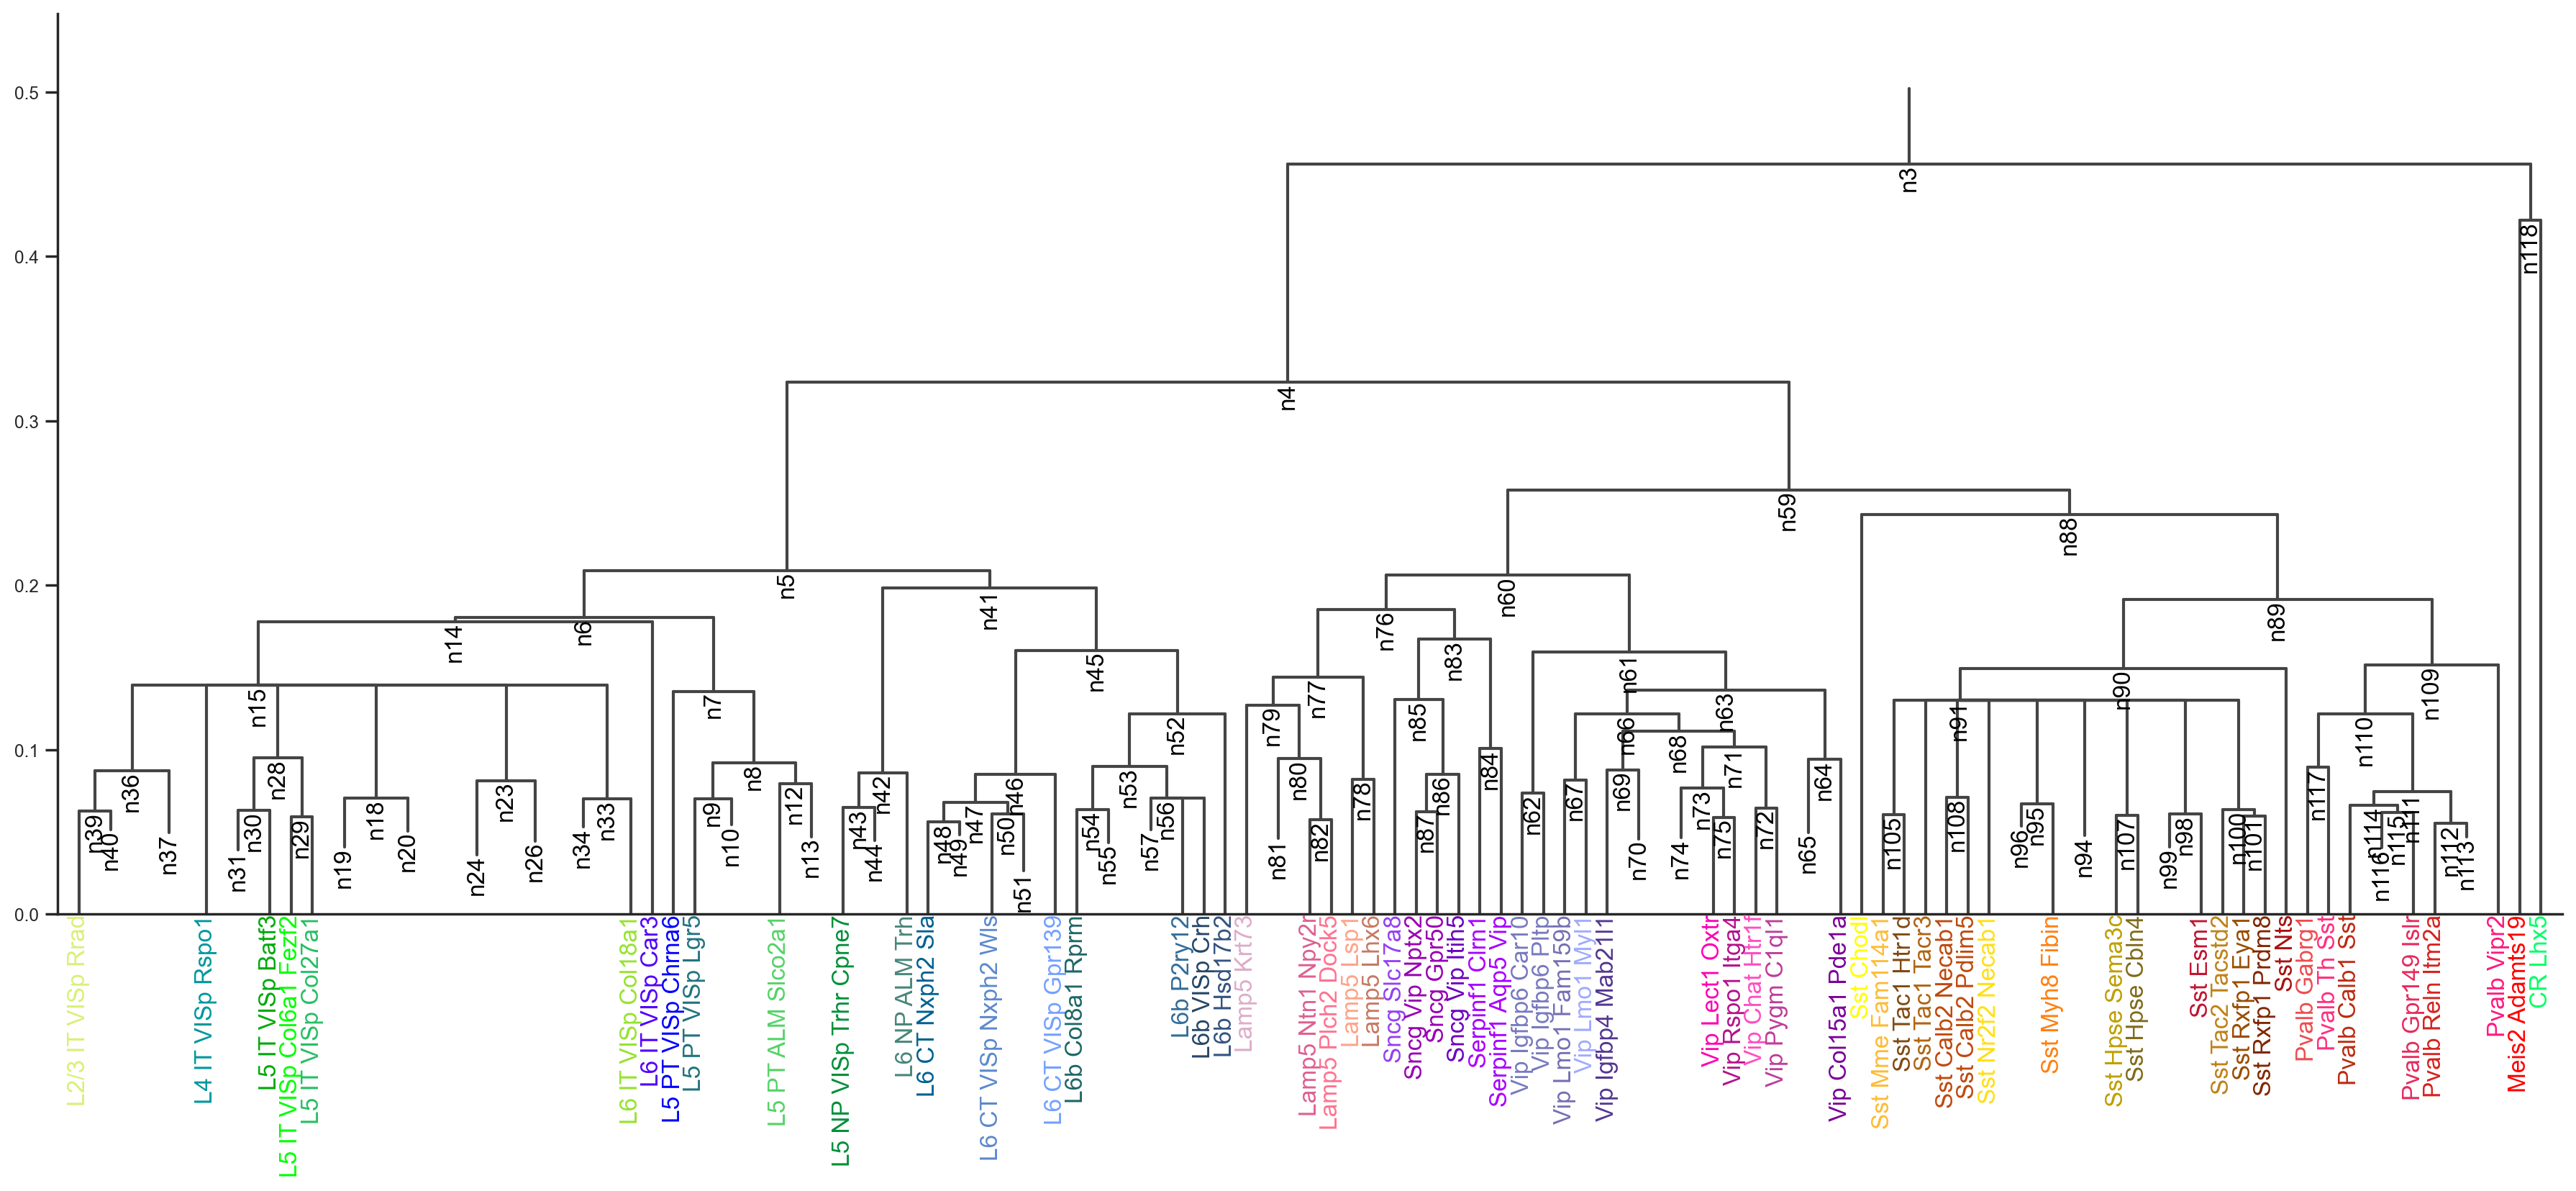



---- Plot: Leaf nodes pushed to 0: ----


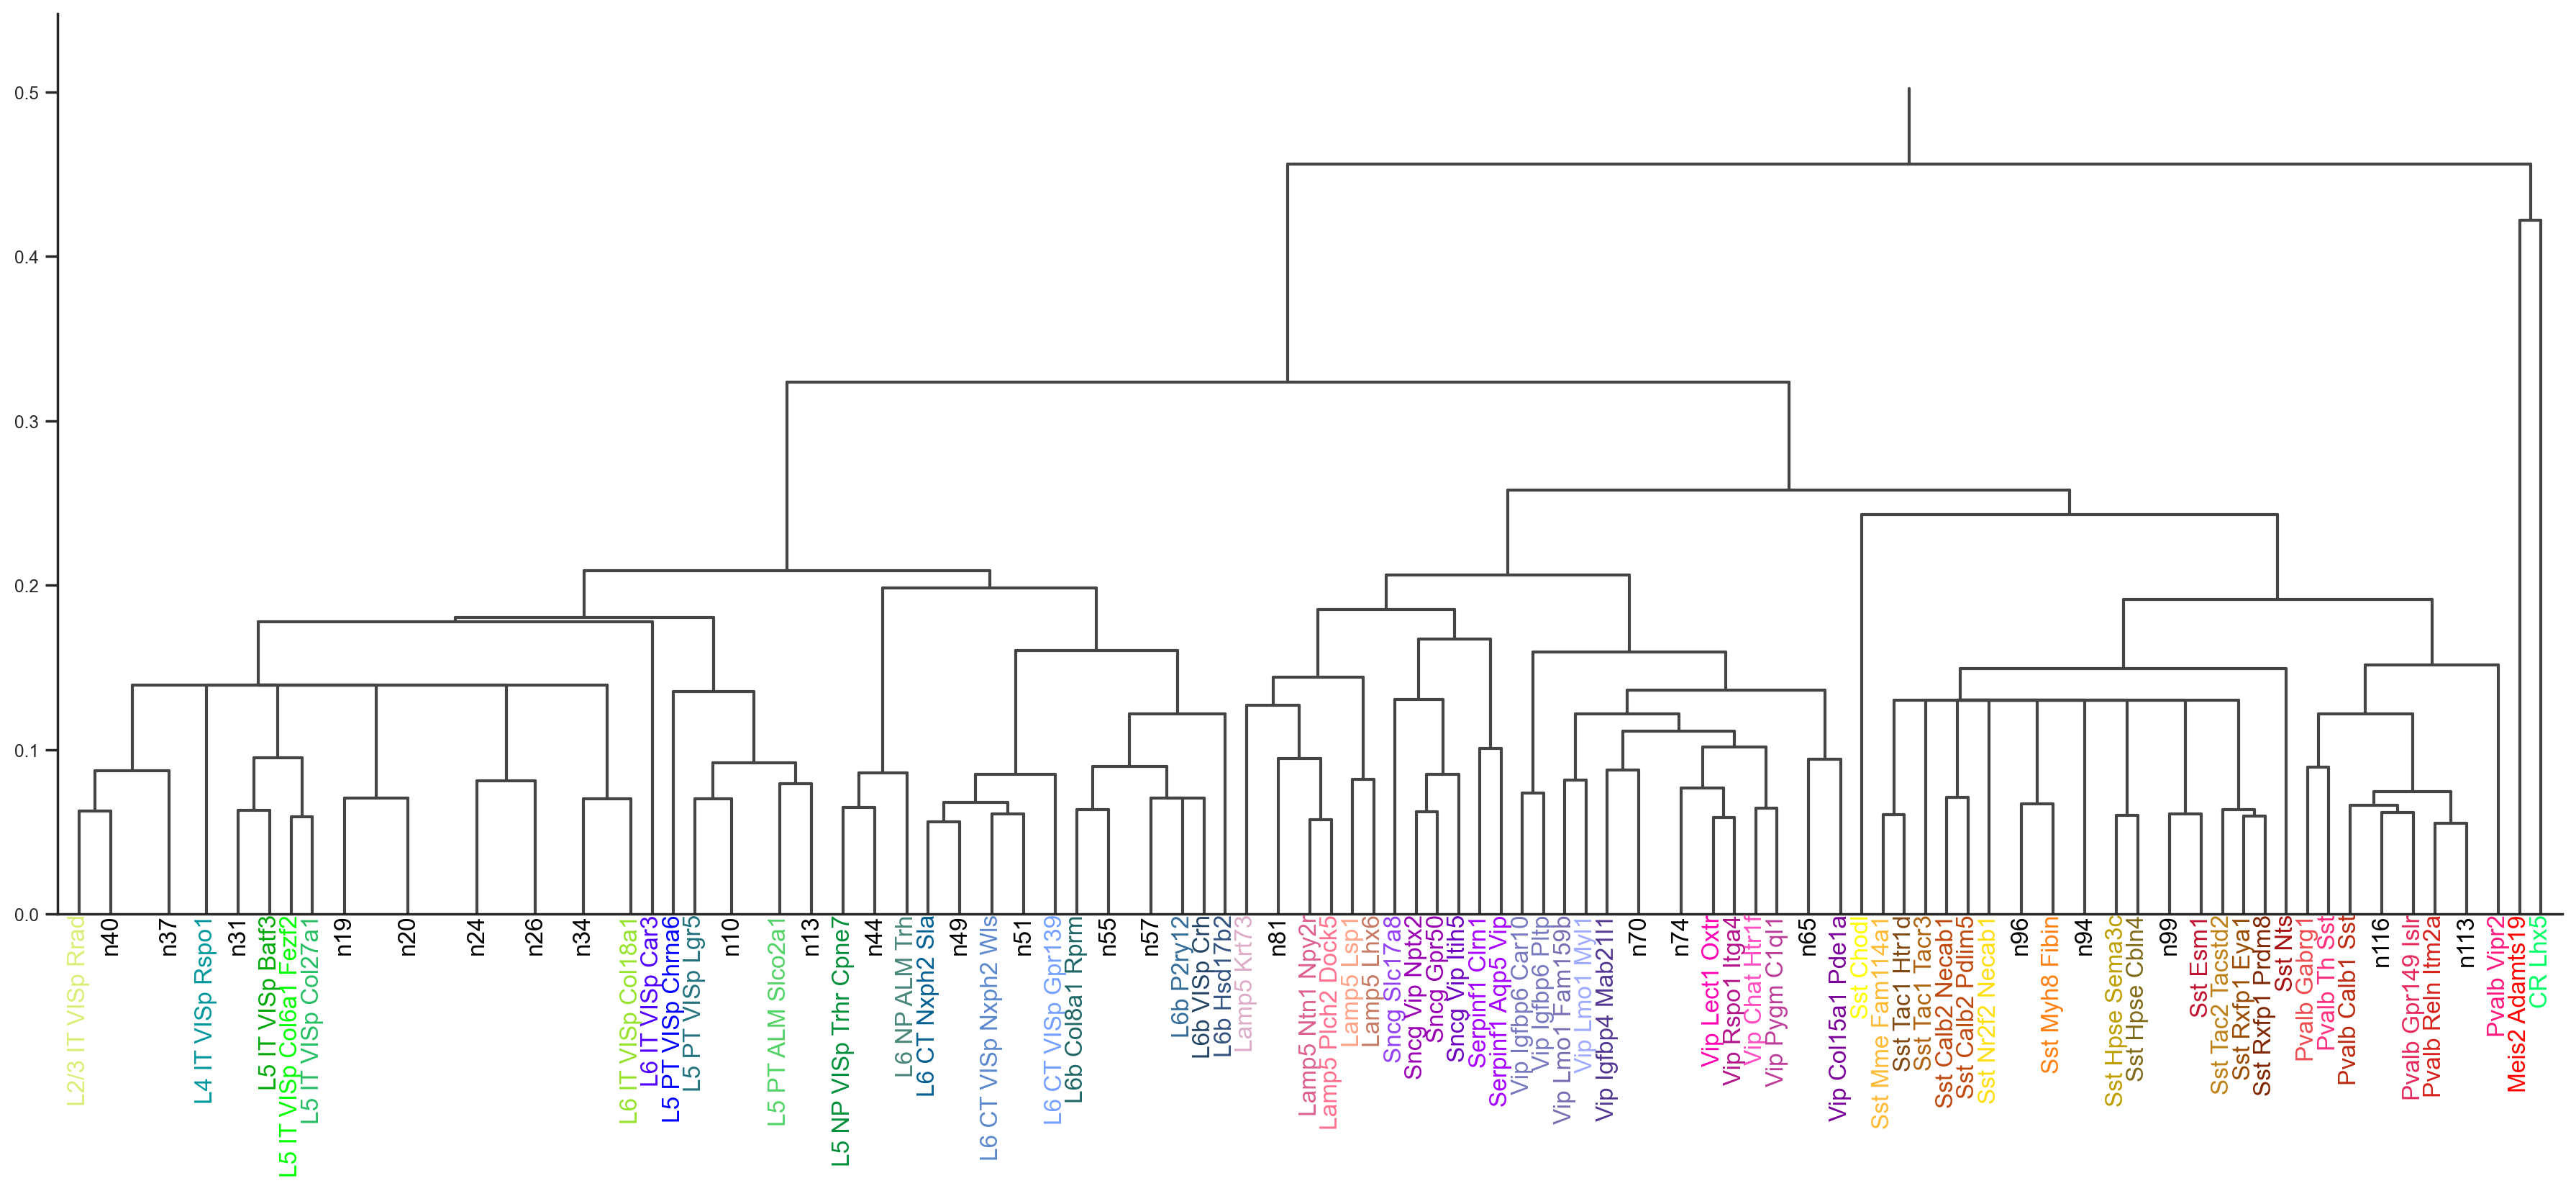



---- Plot: Leaf nodes evenly distributed: ----


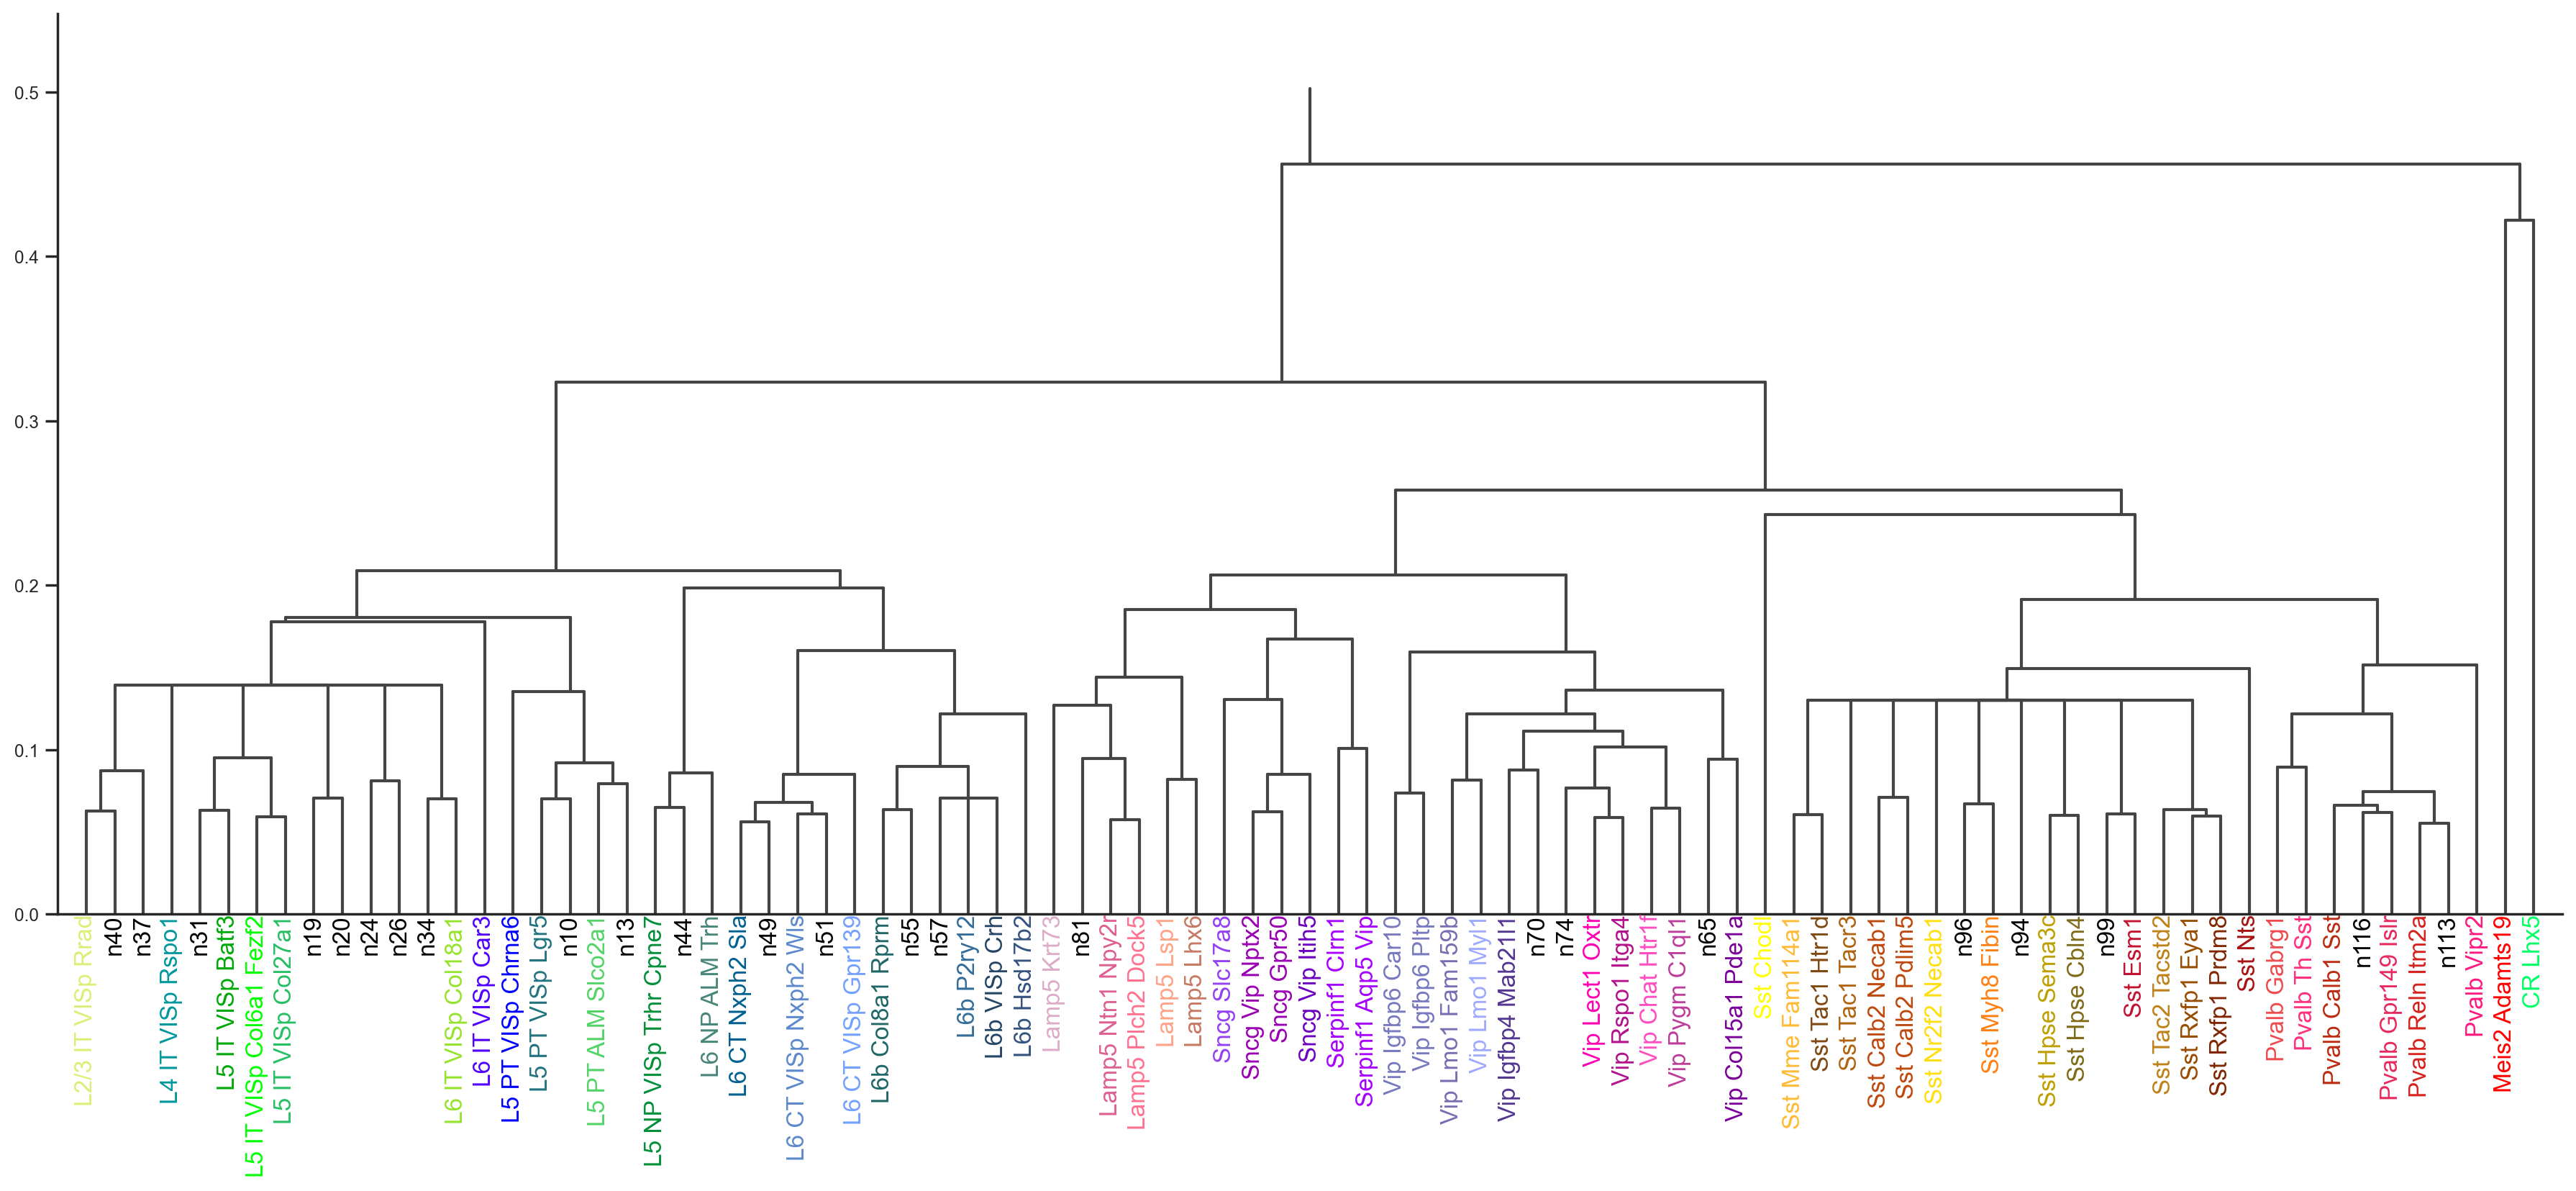

In [4]:
# Choose nodes to be leaf nodes in the partial tree
# kept_leaf_nodes = ['n74','n75','Vip Chat Htr1f','Vip Pygm C1ql1']

# Obtain all relevant ancestor nodes:
kept_tree_nodes = []
for node in kept_leaf_nodes:
    kept_tree_nodes.extend(subtree.get_ancestors(node))
    kept_tree_nodes.extend([node])

kept_subtree_df = subtree.obj2df()
kept_subtree_df = kept_subtree_df[kept_subtree_df["child"].isin(kept_tree_nodes)]

# Plot updated tree:
print("\n\n---- Plot: New leaf subset: ----")
kept_subtree = HTree(htree_df=kept_subtree_df)
kept_subtree.plot((18, 8), fontsize=12, txtleafonly=False, skeletoncol="#444444", fig=None)
plt.show()

print("\n\n---- Plot: Leaf nodes pushed to 0: ----")
kept_subtree_df.loc[kept_subtree_df["child"].isin(kept_leaf_nodes), "isleaf"] = True
kept_subtree_df.loc[kept_subtree_df["child"].isin(kept_leaf_nodes), "y"] = 0.0
mod_subtree = HTree(htree_df=kept_subtree_df)
mod_subtree.plot((18, 8), fontsize=12, txtleafonly=True, skeletoncol="#444444", fig=None)
plt.show()

print("\n\n---- Plot: Leaf nodes evenly distributed: ----")
mod_subtree.update_layout()
mod_subtree.plot((18, 8), fontsize=12, txtleafonly=True, skeletoncol="#444444", fig=None)
plt.show()